# Módulo 2 - Octave/Matlab

***
## Actividad 1

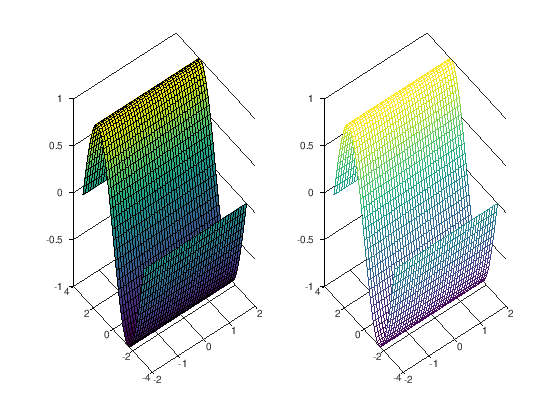

In [1]:
% Creo arrays y matriz con doble for..
x = -2:0.1:2;
y = -pi:0.1:pi;
[X,Y] = meshgrid(x,y);

% Con for anidado..
Z = ones(length(y),length(x));
for i = 1:length(y)
    for j = 1: length(x)
        Z(i,j) = sin(y(i));
    end
end

# Grafico..
figure();
subplot(1,2,1);
surf(X,Y,Z);
subplot(1,2,2);
mesh(X,Y,Z);

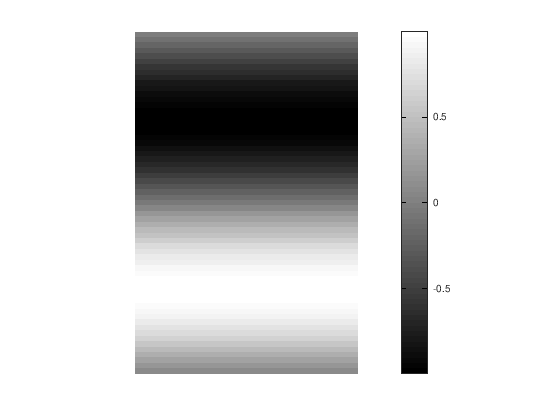

In [2]:
# Grafico como imagen...
imshow(Z,[])
colorbar;

***
## Actividad 2

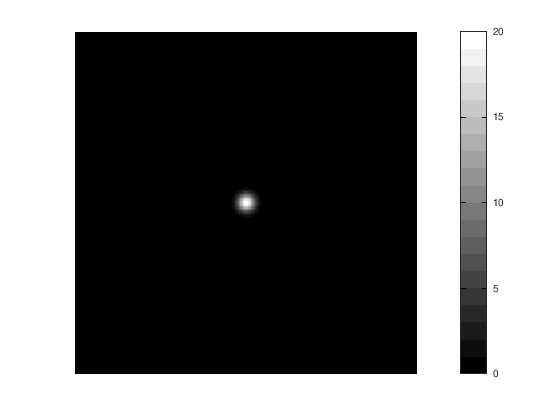

In [3]:
% Armo matrices...
n = 20;
x = 0:1:256;
y = 0:1:256;
[X,Y] = meshgrid(x,y);
Z = 20*exp(-pi*((X-128).^2 + (Y-128).^2)./128); 

% Ploteo como imagen en escala de grises con 20 niveles..
imshow(Z,[]);
colormap(gca, gray(n));
colorbar;

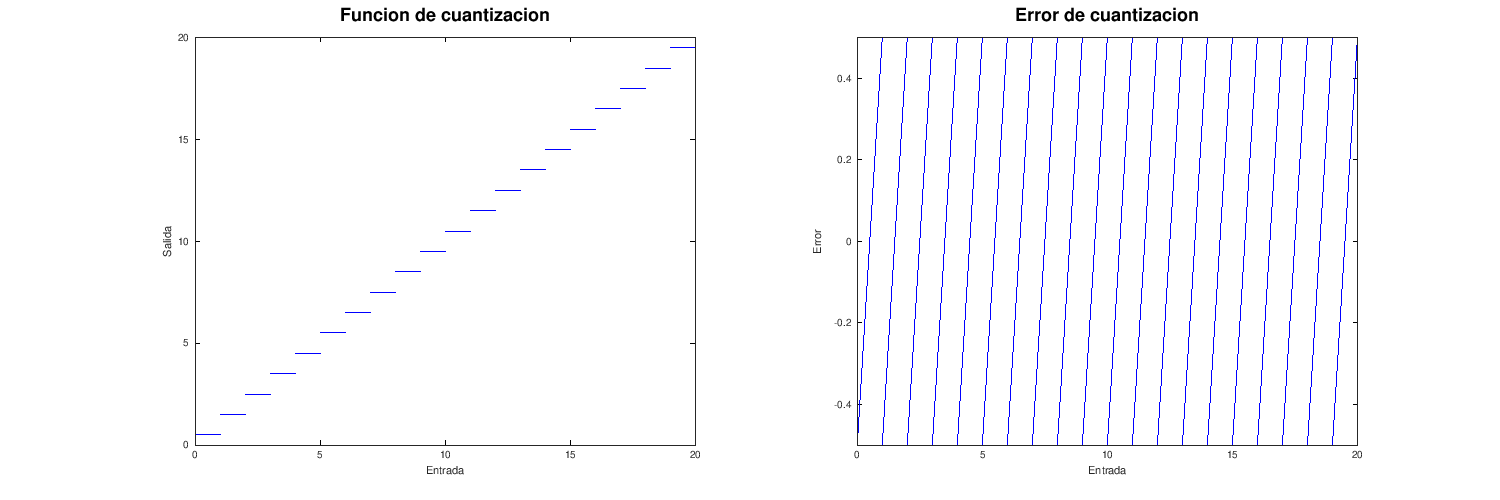

In [5]:
% Armo y grafico función y error de cuantización...
step = (max(Z(:)) - min(Z(:)))/n;
hstep = step/2;
lev = (min(Z(:))+hstep) : step : (max(Z(:))-hstep);

figure('position',[0 0 1500 500]),
for i = 1:length(lev)
   ax1 = subplot(1,2,1);
   plot([lev(i)-hstep,lev(i)+hstep],[lev(i),lev(i)],'b')
   hold on
   ax2 = subplot(1,2,2);
   plot([lev(i)-hstep,lev(i)+hstep],[-hstep,+hstep], 'b')
   ylim([-0.5 0.5])
   hold on
end

title(ax1,'Funcion de cuantizacion', 'fontsize', 18);
ylabel(ax1,'Salida');
xlabel(ax1,'Entrada');
title(ax2,'Error de cuantizacion', 'fontsize', 18);
ylabel(ax2,'Error');
xlabel(ax2,'Entrada');

% Alternativamente usando el comando quantiz()
%%

***
## Actividad 3

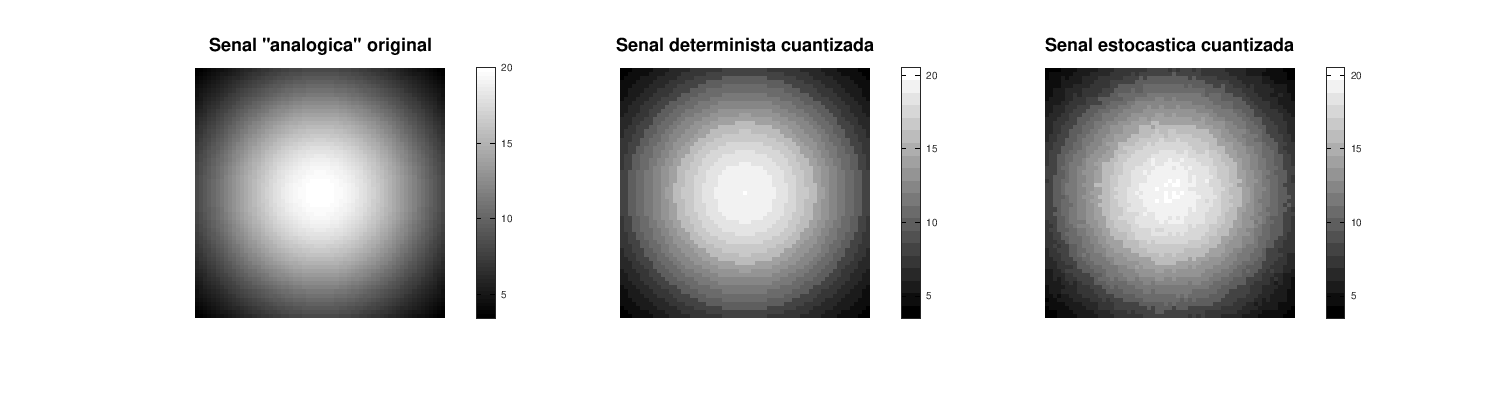

In [6]:
% DOMINIO...
% Tomo solo el centro del dominio para que se vea mejor los efectos se la cuantización en las distintas señales..
dstep = 0.2;
x = 122:dstep:134;
y = 122:dstep:134;
[X,Y] = meshgrid(x,y);

% SEÑALES..
de = 0.2;
Z0 = 20*exp(-pi.*((X-128).^2 + (Y-128).^2)./128);                          % determinista
Z1 = 20*exp(-pi * ((X-128).^2 + (Y-128).^2) ./ 128) + randn(length(x))*de; % estocástica

% Params cuantización...
n = 20;
zstep = max(Z0(:))/n;

# GRAFICO..
tit = {'Senal determinista cuantizada', 'Senal estocastica cuantizada'};
figure('position', [0 0 1500 400])

# Muestro la orignal..
subplot(1, 3 , 1);
imshow(Z0, []);
colorbar;
title('Senal "analogica" original', 'fontsize', 18)

# Muestro las cuantizadas..
ZZ = cat(3, Z0, Z1);
for i=1:2
    z = ZZ(:,:,i);
    z = floor(z./zstep).*zstep + zstep/2;  % cuantizacion
    ax = subplot(1, 3 , i+1);
    imshow(z, []);
    title(ax, tit(1,i), 'fontsize', 18);
    colormap(gca, gray(n));
    colorbar;
end

***
## Actividad 4

In [7]:
% Armo una función..
function [img, info, colormap] = imag_(filename)
 % Leo archivo y metadata.. (no uso el uigetfile porque corriendo esta notebook online no funciona)
     info = imfinfo(filename);
     [img, colormap] = imread(filename);
 % Imprimo la informacion solicitada..
     fprintf('Nombre de archivo: %s.\n', filename)
     fprintf('----------------------------------\n')
     fprintf('Tamano en pixeles: %d.\n', info.Width * info.Height)
     fprintf('Profundidad de bits: %d.\n', info.BitDepth)
     fprintf('Tipo de color: %s.\n', info.ColorType)
     fprintf('Tipo de dato: %s.\n\n', class(img))
 % Muestro la imagen..
     imshow(img,[])
end

Nombre de archivo: ancla.jpg.
----------------------------------
Tamano en pixeles: 45123.
Profundidad de bits: 8.
Tipo de color: truecolor.
Tipo de dato: uint8.

Nombre de archivo: mamo.bmp.
----------------------------------
Tamano en pixeles: 178551.
Profundidad de bits: 8.
Tipo de color: indexed.
Tipo de dato: uint8.

Nombre de archivo: Abdomen1.tif.
----------------------------------
Tamano en pixeles: 2681280.
Profundidad de bits: 8.
Tipo de color: grayscale.
Tipo de dato: uint8.



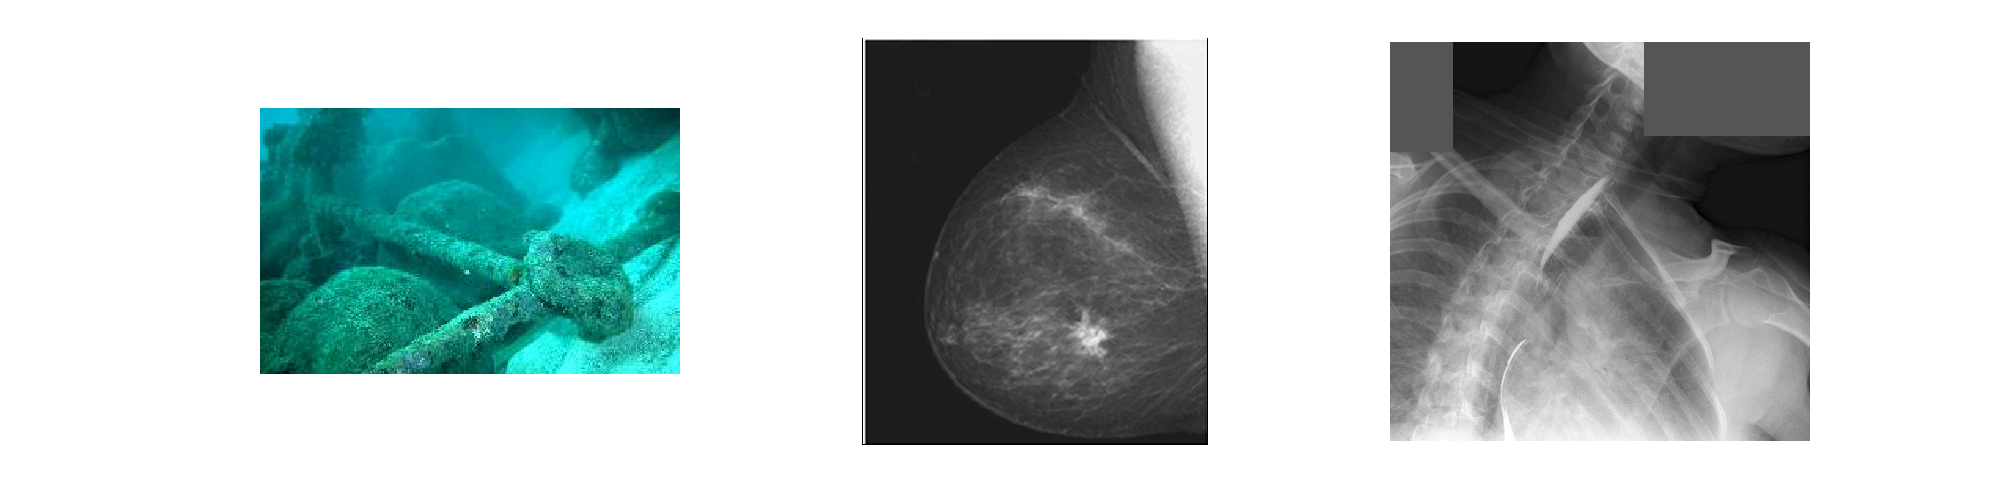

In [20]:
% Uso una funcion para leer la imagen y mostrar la info solicitada..
% Teniendo los archivos en el mismo directorio que el script...
figure('position',[0 0 2000 500])
subplot(1,3,1)
[img, inf, cmap] = imag_('ancla.jpg');
subplot(1,3,2)
[img, inf, cmap] = imag_('mamo.bmp');
subplot(1,3,3)
[img, inf, cmap] = imag_('Abdomen1.tif');

***
***